<a href="https://colab.research.google.com/github/Jisan10667/SWE-3-2-Mechine-Learning-Assignment/blob/main/Regularization_with_Logistic_Regression/Regularization_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
import pprint as pp
import copy
import math

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data2.txt to data2.txt


In [ ]:
data = pd.read_csv('./data2.txt', header=None, names = ["x1","x2","y"])
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [ ]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data['y'] == 0
    pos = data['y'] == 1

    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='+', c='orange', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg]['x1'], data[neg]['x2'], c='blue', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

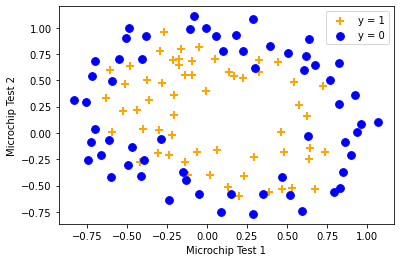

In [ ]:
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [ ]:
n = data.shape[1]-1
x = data[data.columns[0:n]]

y = data[data.columns[n:n+1]]
# convert to np.array
X = x.values
y = y.values
pp.pprint(X)
print(y)

array([[ 0.051267 ,  0.69956  ],
       [-0.092742 ,  0.68494  ],
       [-0.21371  ,  0.69225  ],
       [-0.375    ,  0.50219  ],
       [-0.51325  ,  0.46564  ],
       [-0.52477  ,  0.2098   ],
       [-0.39804  ,  0.034357 ],
       [-0.30588  , -0.19225  ],
       [ 0.016705 , -0.40424  ],
       [ 0.13191  , -0.51389  ],
       [ 0.38537  , -0.56506  ],
       [ 0.52938  , -0.5212   ],
       [ 0.63882  , -0.24342  ],
       [ 0.73675  , -0.18494  ],
       [ 0.54666  ,  0.48757  ],
       [ 0.322    ,  0.5826   ],
       [ 0.16647  ,  0.53874  ],
       [-0.046659 ,  0.81652  ],
       [-0.17339  ,  0.69956  ],
       [-0.47869  ,  0.63377  ],
       [-0.60541  ,  0.59722  ],
       [-0.62846  ,  0.33406  ],
       [-0.59389  ,  0.005117 ],
       [-0.42108  , -0.27266  ],
       [-0.11578  , -0.39693  ],
       [ 0.20104  , -0.60161  ],
       [ 0.46601  , -0.53582  ],
       [ 0.67339  , -0.53582  ],
       [-0.13882  ,  0.54605  ],
       [-0.29435  ,  0.77997  ],
       [-0

In [ ]:
def mapFeature( x1col, x2col):
    degrees = 10
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 )
            out   = np.hstack(( out, term ))
    return out

In [ ]:
XX = mapFeature(X[:,0],X[:,1])
print(X.shape, XX.shape)

(118, 2) (118, 66)


In [ ]:
from scipy.special import expit #Vectorized sigmoid function

#Hypothesis function and cost function for logistic regression
def h(mytheta,myX): #Logistic hypothesis function
    return expit(np.dot(myX,mytheta))

In [ ]:

#Cost function, default lambda (regularization) 0
def computeCost(mytheta,myX,myy,mylambda = 0.):

    m = myy.size # number of training examples

    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [ ]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))
    return g

In [ ]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([-1,-2])
modi = b.T * a[:,:1]
print(modi)
np.sum(modi[:])

[[-1 -2]
 [-4 -8]]


-15

In [ ]:
def compute_cost_logistic(X, y, w, b = 0):
  m = X.shape[0]
  predicted_m = np.dot(X, w)+ b
  sigmoid_m = sigmoid(predicted_m)
  cost_m = - y * np.log(sigmoid_m) - (1-y) * np.log(1-sigmoid_m)
  cost = np.sum(cost_m)/m
  return cost;

In [ ]:
def compute_gradient_logstic(X,y,w):
  m,n = X.shape
  # dj_dw = np.zeros((n))
  a = sigmoid(np.dot(X,w))
  dj_dw = 1/m * np.dot(X.T,(a-y))
  return dj_dw

In [ ]:
def optimize_regularized_weight(w_in,X,y,alpha,num_iters, lambdha=0.):
  J_history = []
  m = X.shape[0]
  w = copy.deepcopy(w_in)
  for i in range(num_iters):
    dj_dw = compute_gradient_logstic(X,y,w)
    w = w*(1-(lambdha/m)) - alpha * dj_dw


    if i% math.ceil(num_iters / 10) == 0:
        J_history.append( compute_cost_logistic(X, y, w) )
        print(f"Iteration {i:4d}: Cost {J_history[-1]} : Weight {w[0]}  ")
  min_cost = compute_cost_logistic(X, y, w)
  return w.T , min_cost, J_history

In [ ]:
J_log = []


In [ ]:
w_in = np.zeros((XX.shape[1],1))
alpha = 0.1
iterations = 10000
lambdha = 10

w_out, min_cost, J_history = optimize_regularized_weight(w_in, XX, y, alpha, iterations, lambdha)
J_log.append(J_history)


Iteration    0: Cost 0.6911003425253381 : Weight [-0.00084746]  
Iteration 1000: Cost 0.6747939075565155 : Weight [0.00808234]  
Iteration 2000: Cost 0.6747939075565155 : Weight [0.00808234]  
Iteration 3000: Cost 0.6747939075565155 : Weight [0.00808234]  
Iteration 4000: Cost 0.6747939075565155 : Weight [0.00808234]  
Iteration 5000: Cost 0.6747939075565155 : Weight [0.00808234]  
Iteration 6000: Cost 0.6747939075565155 : Weight [0.00808234]  
Iteration 7000: Cost 0.6747939075565155 : Weight [0.00808234]  
Iteration 8000: Cost 0.6747939075565155 : Weight [0.00808234]  
Iteration 9000: Cost 0.6747939075565155 : Weight [0.00808234]  


In [ ]:
[row[-1] for row in J_log]

[0.33589812736190366,
 0.33589812736190366,
 0.609283496566788,
 0.6624407575367436,
 0.6747939075565155]

In [ ]:
from scipy import optimize
initial_theta = np.zeros((XX.shape[1],1))

def optimizeRegularizedTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun

theta, mincost = optimizeRegularizedTheta(initial_theta,XX,y)
print("Theta:", theta)
print(mincost)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


Theta: [[    868.84054058    4534.48962082    1095.66681739   -2757.61304326
    -6310.91175485    4177.88229016  -23442.61782521   -1504.30450487
   -40503.3033797    -5620.86894657   -6075.16799253   63349.01927081
     6211.26629527  -10960.22428473  -27287.43128344   11821.51229956
    20784.01796073  121820.62865485   -8233.99749389   92736.05945366
    31481.33216037   34977.09014299 -122774.72426619  -45831.54534935
    26826.60086923   -4748.73550875  -58394.49473922   15703.76946695
    51579.91050489   -7724.86698557   16159.92278758   32259.10372842
  -133265.42114397   40508.45797584   74309.22529075   -8764.15370967
   -14956.11493949  -25890.65691832   -7531.66702002  -62491.68241741
   -54118.00484462  -25095.67404217   -7772.05881517    6146.93414382
   -35403.15687165   -6573.89903077    6529.09159978   29202.92552007
    27939.62870326 -135925.40624907   13739.43600098  -33679.50093655
    10569.30245065  -18361.10377732   17207.06191972  -81950.05512087
    17890.567

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [ ]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    # Using sclearn package
    # theta, mincost = optimizeRegularizedTheta(mytheta,myX,myy,mylambda)

    # Using built_in function
    alpha = 0.1
    iterations = 10000
    theta, mincost, _ = optimize_regularized_weight(mytheta,myX,myy,alpha,iterations,mylambda)

    print(theta, theta.shape, '\n\nCost : ', mincost, '\n \n ')

    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
            # print(type(zvals), zvals.shape)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

Iteration    0: Cost 0.6911003425253381 : Weight [-0.00084746]  
Iteration 1000: Cost 0.44647789944266 : Weight [1.2648837]  
Iteration 2000: Cost 0.39743613476639833 : Weight [1.80937377]  
Iteration 3000: Cost 0.3746364734483639 : Weight [2.16265257]  
Iteration 4000: Cost 0.36144330340135483 : Weight [2.42134979]  
Iteration 5000: Cost 0.35283455673209946 : Weight [2.62317845]  
Iteration 6000: Cost 0.3467608579176805 : Weight [2.78682502]  
Iteration 7000: Cost 0.34223291454267 : Weight [2.92298006]  
Iteration 8000: Cost 0.3387163893298174 : Weight [3.03837555]  
Iteration 9000: Cost 0.33589812736190366 : Weight [3.13754822]  
[[ 3.22363139  2.24852383  3.54472724 -4.73277929 -4.00251365 -5.08662265
   1.3302565  -1.45164717 -0.81523695 -0.42015067 -3.52263632  0.21068614
  -2.26033675 -1.30456876 -3.37850153 -0.1271164  -0.68090551  0.40326913
  -1.32232433 -1.2711767  -0.24508788 -2.64604094  0.3110365  -0.95917012
   0.30925148 -1.36694427 -0.90611378 -1.59994366 -0.70478407 -0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: No contour levels were found within the data range.


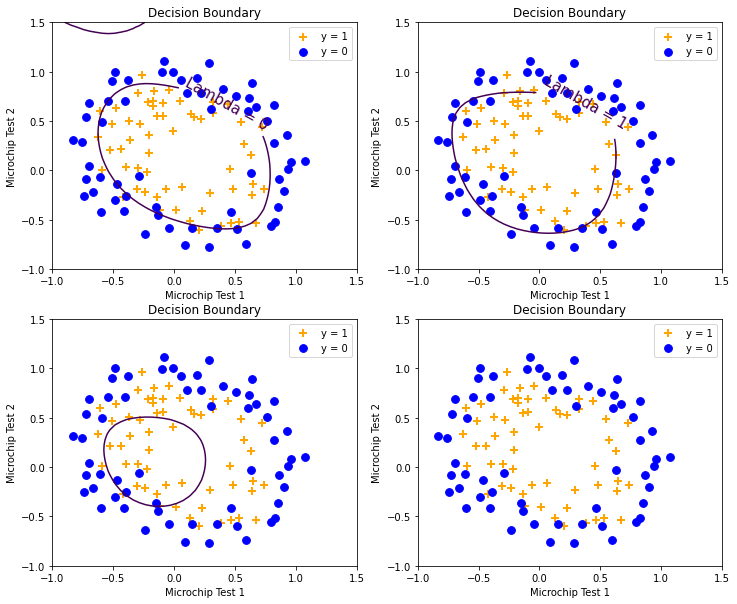

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta, XX, y, 0.)

plt.subplot(222)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,1.)

plt.subplot(223)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,10.)

plt.subplot(224)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,50.)